## Library

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Load Dataset

In [3]:
file_path = '/Users/nychanthrith/data-science-project/data/Clean data/cleaned_data_January.csv'
data = pd.read_csv(file_path)

## Drop some column

In [4]:
X = data.drop(columns=['Month', 'Day', 'Time of Day', 'Target', 'Index'])  # Features
y = data['Target']

## Do the train split 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## using Random Forest

In [6]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

## Take the importance features

In [7]:
feature_importance = rf.feature_importances_
features = X.columns

## Plot data

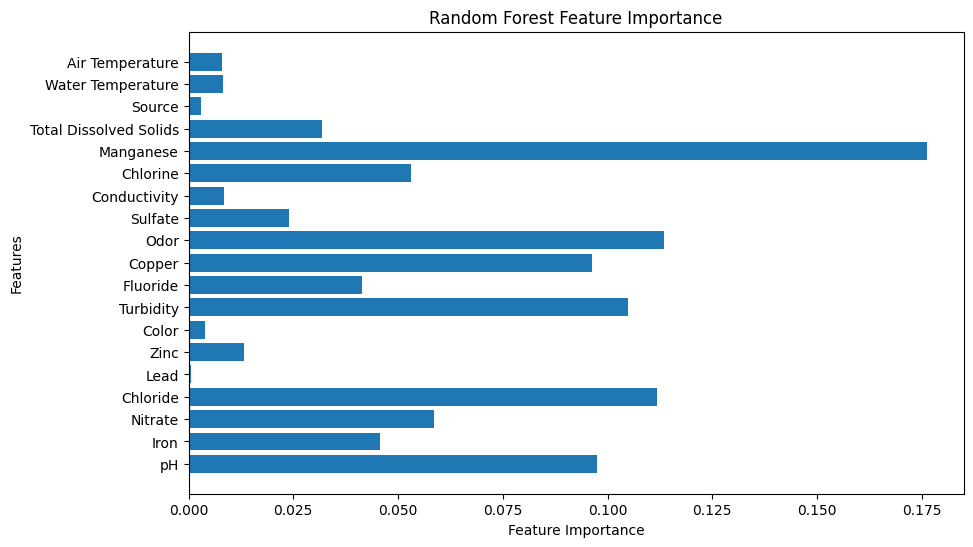

In [8]:
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

## Calculate the accuracy

In [9]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.8573


## Test the best parameter

In [10]:
from sklearn.model_selection import GridSearchCV

## Find the best parameter to pre

In [11]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10],
# }

# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# print("Best Parameters:", grid_search.best_params_)

# Find the best parameter to predict

## Train the Random Forest Model
**The best parameter:**
- **n_estimator: 200**
- **max_depth: 15**
- **min sample split: 2**

In [12]:
param_grid = {
    'n_estimators': 200,
    'max_depth': 15,
    'min_samples_split': 2,
    'random_state': 42
}

In [13]:
rf.fit(X, y)
print("Random Forest model trained with optimal parameters!")

Random Forest model trained with optimal parameters!


## Simulate New Month’s Data

In [14]:
num_samples = 30
new_month_data = pd.DataFrame()

In [15]:
import numpy as np

In [16]:
for column in X.columns:
    mean = X[column].mean()
    std = X[column].std()
    new_month_data[column] = np.random.normal(loc=mean, scale=std, size=num_samples)

In [22]:
X_new = new_month_data

In [17]:
print("Simulated new month's feature data:")
print(new_month_data.head())

Simulated new month's feature data:
         pH      Iron   Nitrate  Chloride          Lead      Zinc     Color  \
0  8.753147  0.073862  1.935615  5.328159  6.481884e-07  0.612864  1.722682   
1  6.931365  0.044488  1.514920  5.068433  2.165377e-08  1.547798  3.112116   
2  7.490169  0.024040  1.672093  4.982948  7.794736e-09  0.746506  1.336308   
3  6.396939 -0.015247  1.102945  5.642961  1.932223e-07  0.054628  3.043758   
4  4.687452  0.010241  1.920383  4.930620  3.954721e-07  1.080548  2.763114   

   Turbidity  Fluoride    Copper      Odor   Sulfate  Conductivity  Chlorine  \
0   0.210790  1.054527  0.062481  2.535293  4.964265     18.806736  1.906490   
1  -0.044195  1.236989  0.062071  1.919398  5.071343     22.438924  1.760153   
2  -0.059014  0.886057  0.161057  2.185559  5.256076     15.523164  2.034367   
3   0.189478  1.077865  0.472385  2.261627  5.282363     31.066273  1.923115   
4   0.409524  0.481777  0.183980  0.506840  3.896863     14.805413  1.913615   

   Manga

## Predict the Target for the Simulated Data

In [18]:
predictions = rf.predict(new_month_data)

In [24]:
new_month_data['Predicted Target'] = predictions

## Save Predictions to a CSV File

In [25]:
folder_path = '/Users/nychanthrith/data-science-project/data/Predicted data/'
file_name = 'predicted_target_next_month.csv'

In [28]:
import os

In [30]:
output_file_path = folder_path + file_name
# output.to_csv(output_file_path, index=False)
new_month_data.to_csv(output_file_path, index=False)

print(f"Predictions for the next month's target saved to: {output_file_path}")

Predictions for the next month's target saved to: /Users/nychanthrith/data-science-project/data/Predicted data/predicted_target_next_month.csv


In [23]:
predicted_data = X_new.copy()

In [ ]:
predicted_data['']